<a href="https://colab.research.google.com/github/NaguMadem/Machine-Learning-Projects/blob/main/YOLO_Algorithem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install opencv-contrib-python==3.4.13.47 --force-reinstall

  Using cached opencv_contrib_python-3.4.13.47-cp37-cp37m-manylinux2014_x86_64.whl (53.7 MB)
  Using cached numpy-1.21.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 3.4.13.47
    Uninstalling opencv-contrib-python-3.4.13.47:
      Successfully uninstalled opencv-contrib-python-3.4.13.47
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [38]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")

In [39]:
classes =[]
with open("./coco.names",'r') as f:
  classes = f.read().splitlines()

In [40]:
len(classes)

80

In [41]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [55]:
img = cv2.imread("./2.png")
blob = cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop=False)


In [56]:
blob.shape

(1, 3, 320, 320)

In [63]:
width, height = img.shape[:2]

In [64]:
width

421

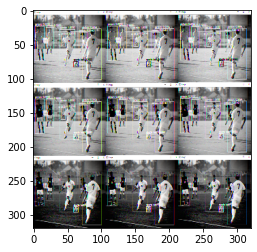

In [65]:
#to print image
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [66]:
yolo.setInput(blob)

In [67]:
output_layers_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_name)

In [68]:
layeroutput

[array([[0.08021433, 0.05372416, 0.2548136 , ..., 0.        , 0.        ,
         0.        ],
        [0.05507206, 0.05298641, 0.31878272, ..., 0.        , 0.        ,
         0.        ],
        [0.0467727 , 0.05755739, 1.3152978 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.93887913, 0.9591748 , 0.3117042 , ..., 0.        , 0.        ,
         0.        ],
        [0.94682235, 0.9377405 , 0.28106976, ..., 0.        , 0.        ,
         0.        ],
        [0.95977926, 0.9437588 , 0.9926063 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.04093953, 0.02922644, 0.03864339, ..., 0.        , 0.        ,
         0.        ],
        [0.03639957, 0.02783057, 0.04932226, ..., 0.        , 0.        ,
         0.        ],
        [0.02139999, 0.02529639, 0.1776838 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9731927 , 0.9794219 , 0.0342509 , ..., 0.        , 0.        ,
         0.        

In [80]:
boxes = []
confidences = []
class_ids= []
for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)

      w = int(detection[0]*width)
      h = int(detection[0]*height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
    

In [82]:
len(boxes)

4

In [83]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [85]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size = (len(boxes),3))


In [89]:
for i in indexes.flatten():
  x,y,w,h = boxes[i] 

  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i],2))
  color = colors[i]
  cv2.rectangle(img, (x,y),(x+w,y+h),color,1)
  cv2.putText(img,label + " " + confi, (x,y+20),font,2,(255,255,255),1)

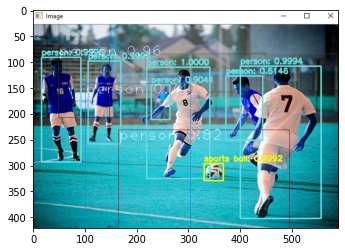

In [90]:
plt.imshow(img)